In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

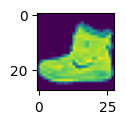

In [6]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[0])

In [7]:
y_train[0]

9

In [8]:
class_label = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
class_label[y_train[0]]

'Ankle boot'

In [10]:
def plot_fashion(X,_title = None):
    '''
    X: test_data
    _title: 'Title of your plot'
    '''
    
    plt.figure(figsize = (10,1))
    plt.title(_title)
    plt.imshow(X)

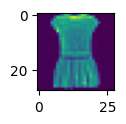

In [11]:
plot_fashion(X_train[3])

In [12]:
class_label[y_train[2]]

'T-shirt/top'

In [13]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [14]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

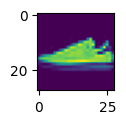

In [17]:
plot_fashion(X_train_scaled[6])

In [18]:
class_label[y_train[6]]

'Sneaker'

In [19]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10
).astype('float32')

In [20]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(700,activation = 'relu'),
    keras.layers.Dense(600,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_scaled,y_train_categorical,epochs = 5)

C:\Users\dell\OneDrive\Desktop\TensorFlowCodeBasic\TF_Tutorial\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7082 - loss: 0.9294
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8346 - loss: 0.4762
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8508 - loss: 0.4296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8570 - loss: 0.4076
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8658 - loss: 0.3839


In [22]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10
).astype('float32')

model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8549 - loss: 0.4129


[0.4116881787776947, 0.8518999814987183]

In [23]:
prediction = model.predict(X_test_scaled)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[5.52547537e-02, 1.04723722e-02, 2.59359945e-02, ...,
        9.98197317e-01, 7.85027564e-01, 9.98938799e-01],
       [9.42484677e-01, 1.77470863e-01, 9.99993265e-01, ...,
        1.79768147e-04, 6.34745359e-01, 9.90429253e-05],
       [9.73920226e-01, 9.99996722e-01, 7.07406163e-01, ...,
        1.06741026e-01, 2.27390140e-01, 9.55420604e-04],
       ...,
       [9.38630641e-01, 1.98252611e-02, 6.32102728e-01, ...,
        1.29097432e-01, 9.96326745e-01, 9.52220149e-03],
       [5.19601226e-01, 9.99977350e-01, 2.92345762e-01, ...,
        1.21706806e-01, 7.20810741e-02, 4.97301184e-02],
       [1.22777440e-01, 6.83566704e-02, 1.70639217e-01, ...,
        9.82183874e-01, 7.60101020e-01, 6.90432370e-01]], dtype=float32)

In [24]:
class_label[np.argmax(prediction[0])]

'Ankle boot'

In [25]:
class_label[y_test[0]]

'Ankle boot'

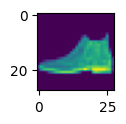

In [26]:
plot_fashion(X_test_scaled[0])

In [27]:
def _predict(X,num_prediction = 5,prediction_plot = True):
    '''
    It's a modified prediction function which takes (X: test data ) from user and does the prediction.
    
    Args like: num_prediction = 5 , prediction_plot = True are default.
    However, you can modify them while calling this function.
    '''
    
    prediction = model.predict(X)
    predicted_classes = []
    for i in range(num_prediction):
        _class_label = class_label[np.argmax(prediction[i])]
        
        if prediction_plot:
            plot_fashion(X[i],_title = _class_label)
        
        predicted_classes.append(_class_label)
    return f"(Predictions: {predicted_classes})"

In [28]:
_predict(X_test_scaled,num_prediction = 20,prediction_plot = False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


"(Predictions: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal', 'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag', 'T-shirt/top'])"

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


"(Predictions: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'])"

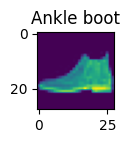

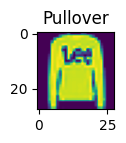

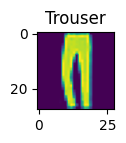

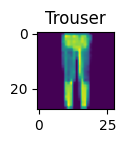

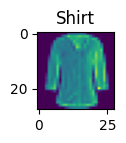

In [29]:
_predict(X_test_scaled)

In [30]:
print(_predict.__doc__)


    It's a modified prediction function which takes (X: test data ) from user and does the prediction.
    
    Args like: num_prediction = 5 , prediction_plot = True are default.
    However, you can modify them while calling this function.
    
